# Optimal Trajectory for Drones using Reinforcement Learning 

![](b2.png)

# Importing Dependencies

In [52]:
import numpy as np
import pylab as plt
import networkx as nx
import math as m

# Initializing Parameters
1. Cost
2. Network parameters (alpha, beta)
3. Frequency Parameter (lambda)
4. Distance in secure region (d)
5. Max distance (dmax)

In [53]:
cost =1
alpha = 0.6
beta = 0.45454
freq_lambda =  10000 
d = 5000
dmax = 5400

# Rewards Initialization

In [54]:
R_sec = alpha *((d/dmax)**0.4)*cost
R_ntwk = (cost/beta)*(m.log(10000,10))
R_net = (R_sec + R_ntwk)
Rmax = 100

# Defining the total Trajectory:

![](states.JPG)

In [55]:
points_list = [(0,0),(0,1),(0,2),(1,1),(1,2),(1,3),(2,1),(2,2),(3,3)]

#setting the goal
goal = 3

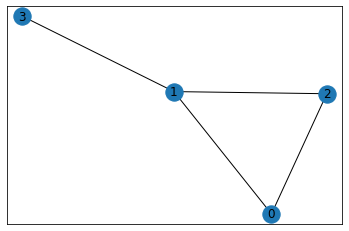

In [56]:
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

# Reward Calculation :

In [57]:
gamma = 0.8 #discount factor

#initialize the reward matrix X
MATRIX_SIZE = 4

#Rewards
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

#change the values to be 0 if it is a viable path and 100 if it is a goal path
for point in points_list:
    if point[1] == goal:
        R[point] = Rmax
    else:
        R[point] = R_net

print("R(s,a)=",R)
#print(R)

R(s,a)= [[  9.38191636   9.38191636   9.38191636  -1.        ]
 [ -1.           9.38191636   9.38191636 100.        ]
 [ -1.           9.38191636   9.38191636  -1.        ]
 [ -1.          -1.          -1.         100.        ]]



# Q Matrix Initialization and update:

In [58]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
print('Q(s,a)=',Q)


Q(s,a)= [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [59]:

#creating some helper functions

# available_actions returns the possible movements from a given point
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

# sample_next_action chooses randomly the next move based on the list of possible moves
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

#update updates the current state with the next move, updating the Q-learning matrix in the process
# Q(state, action) = R(state, action) + Gamma * Max[Q(next state, all actions)]
def update(current_state, action, gamma):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
#     print('max_value', R[current_state, action] + gamma * max_value)

    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
      return(0)

# Optimal trajectory- when drone starts at S0 :

In [60]:
initial_state =0
current_state = initial_state
steps = [current_state]

while current_state != goal:

    next_step_index = np.where(Q[current_state,]
        == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

Most efficient path:
[0, 3]


In [61]:
episodes = 400 
scores = []
for i in range(episodes):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)


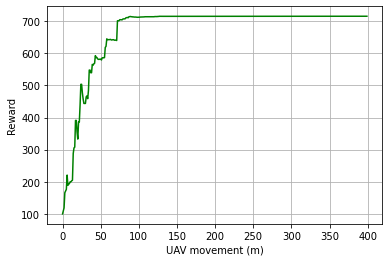

In [62]:
plt.plot(scores,'g-')
plt.xlabel('UAV movement (m)')
plt.ylabel('Reward')
plt.grid(b=None, which='major', axis='both')
plt.show()


# Case 2: Drone starts at S1

In [63]:
initial_state =1
current_state = initial_state
steps = [current_state]

while current_state != goal:

    next_step_index = np.where(Q[current_state,]
        == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

Most efficient path:
[1, 3]


# Case 3: Drone starts at S2

In [69]:
initial_state =2
current_state = initial_state
steps = [current_state]

while current_state != goal:

    next_step_index = np.where(Q[current_state,]
        == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

Most efficient path:
[2, 1, 3]
